In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [5]:
def create_speed_controller():
    # Creating input variables
    speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
    distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')

    # Creating output variable
    brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

    # Membership functions for speed
    speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 50])
    speed['medium'] = fuzz.trimf(speed.universe, [0, 50, 100])
    speed['fast'] = fuzz.trimf(speed.universe, [50, 100, 100])

    # Membership functions for distance
    distance['near'] = fuzz.trimf(distance.universe, [0, 0, 50])
    distance['far'] = fuzz.trimf(distance.universe, [50, 100, 100])

    # Membership functions for brake pressure
    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [0, 50, 100])
    brake['high'] = fuzz.trimf(brake.universe, [50, 100, 100])

    return speed, distance, brake


In [6]:
def create_rules(speed, distance, brake):
    rule1 = ctrl.Rule(speed['fast'] & distance['near'], brake['high'])
    rule2 = ctrl.Rule(speed['medium'] & distance['near'], brake['medium'])
    rule3 = ctrl.Rule(speed['slow'] & distance['near'], brake['low'])
    rule4 = ctrl.Rule(speed['fast'] & distance['far'], brake['low'])
    rule5 = ctrl.Rule(speed['slow'] & distance['far'], brake['low'])

    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    return braking


In [8]:
def calculate_brake(braking, speed_value, distance_value):
    braking.input['speed'] = speed_value
    braking.input['distance'] = distance_value

    # Compute the fuzzy result
    braking.compute()
    return braking.output['brake']

In [13]:
def plot_fuzzy_variables(speed, distance, brake):
    speed.view()
    plt.show()  # Show the speed plot

    distance.view()
    plt.show()  # Show the distance plot

    brake.view()
    plt.show()  # Show the brake plot


In [17]:
def main():
    # Step 1: Create fuzzy variables
    speed, distance, brake = create_speed_controller()

    # Step 2: Create fuzzy rules
    braking = create_rules(speed, distance, brake)

    # Step 3: Calculate brake pressure
    speed_value = 80
    distance_value = 20
    brake_pressure = calculate_brake(braking, speed_value, distance_value)
    print(f"Calculated Brake Pressure: {brake_pressure:.2f}")

    # Step 4: Plot membership functions
    plot_fuzzy_variables(speed, distance, brake)


Calculated Brake Pressure: 58.78


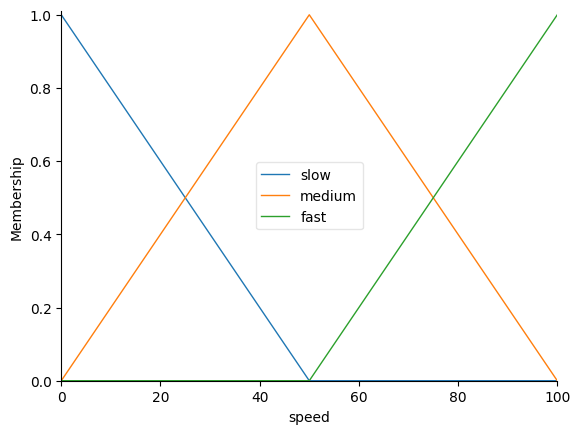

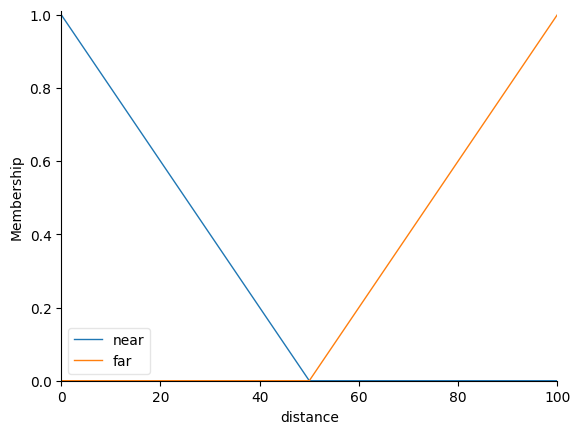

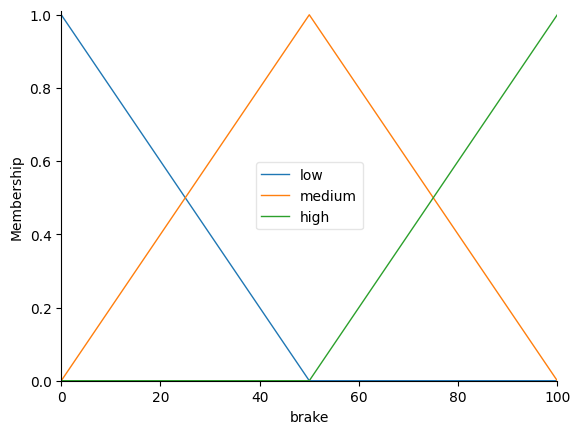

In [18]:
if __name__ == "__main__":
    main()